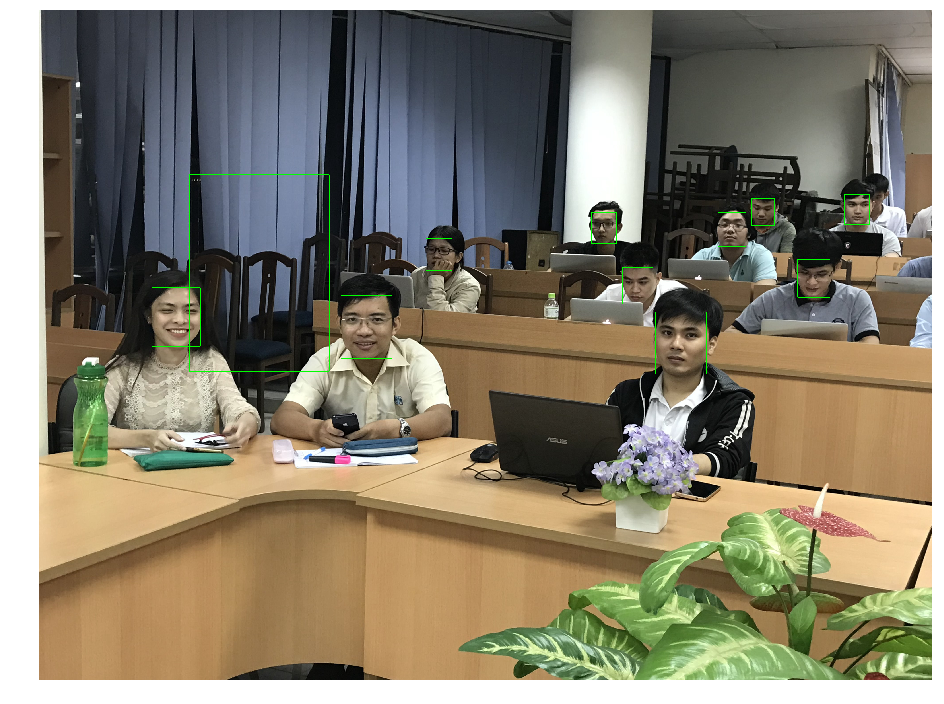

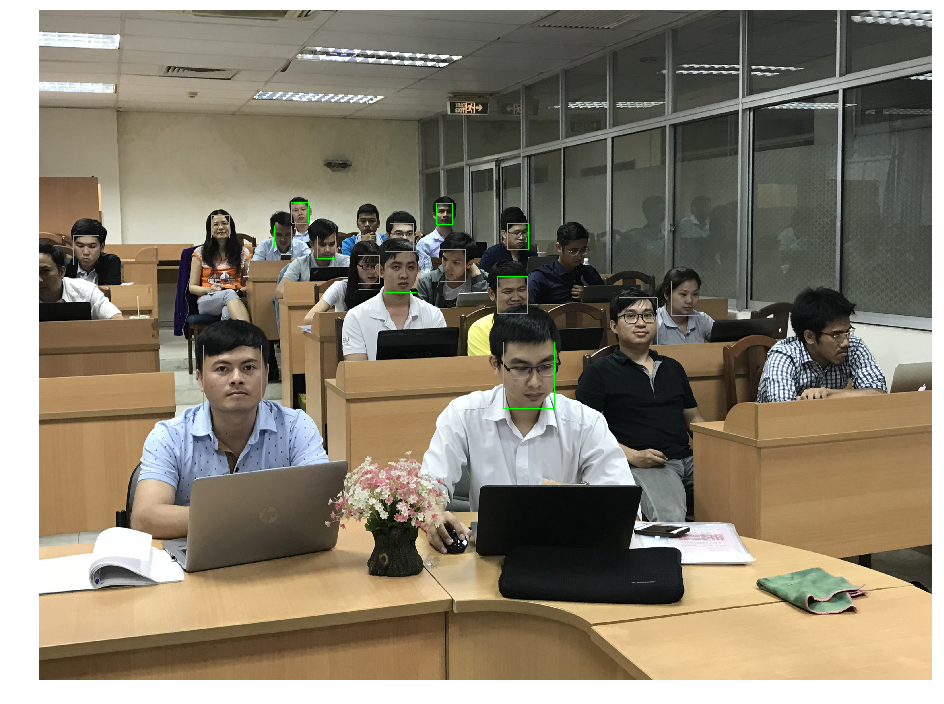

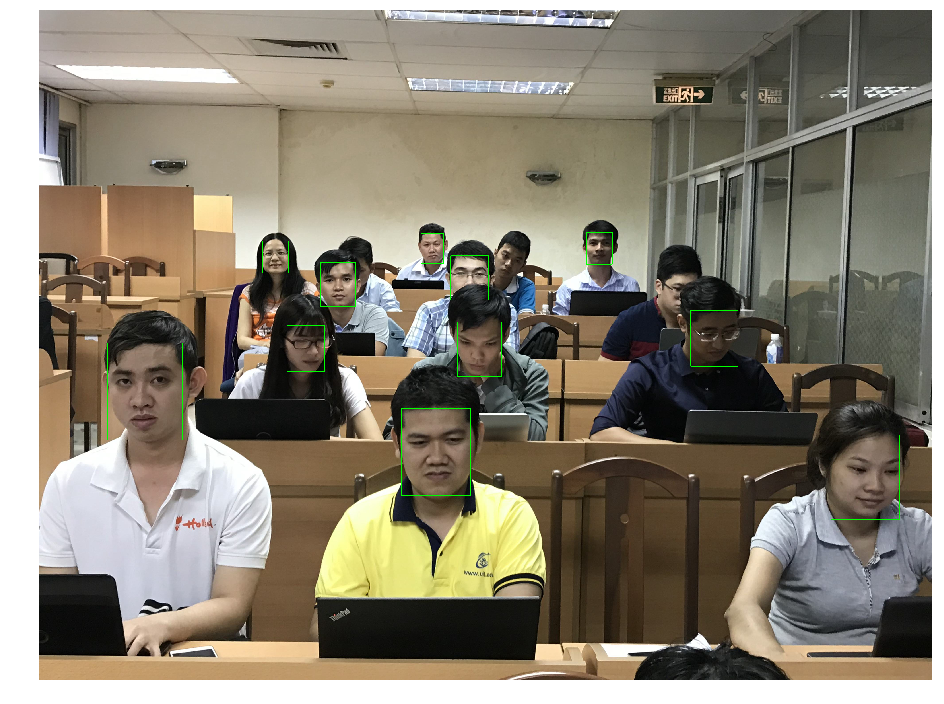

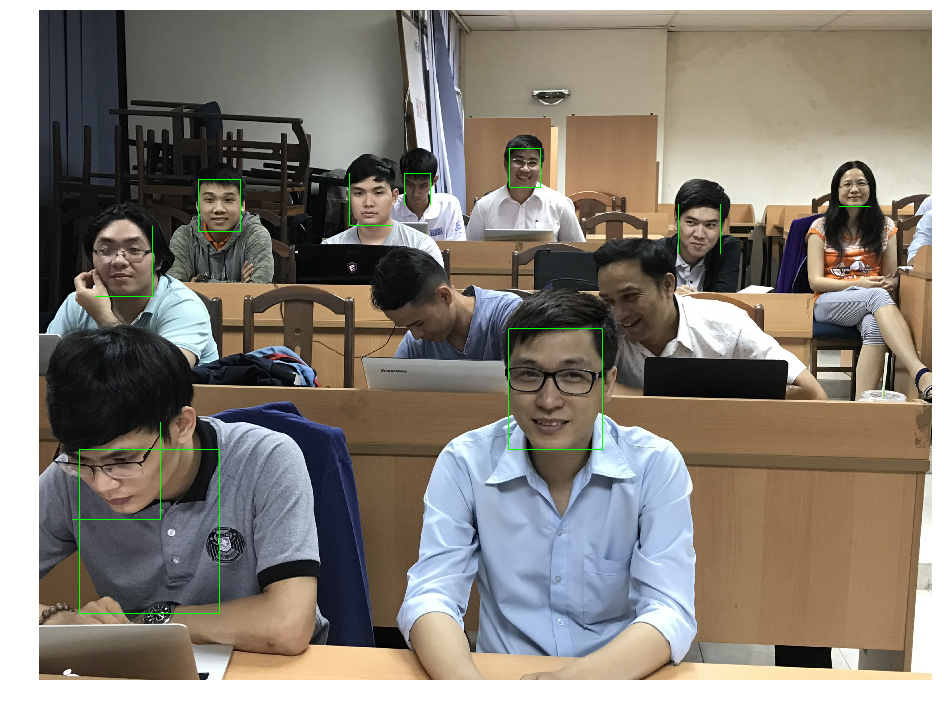

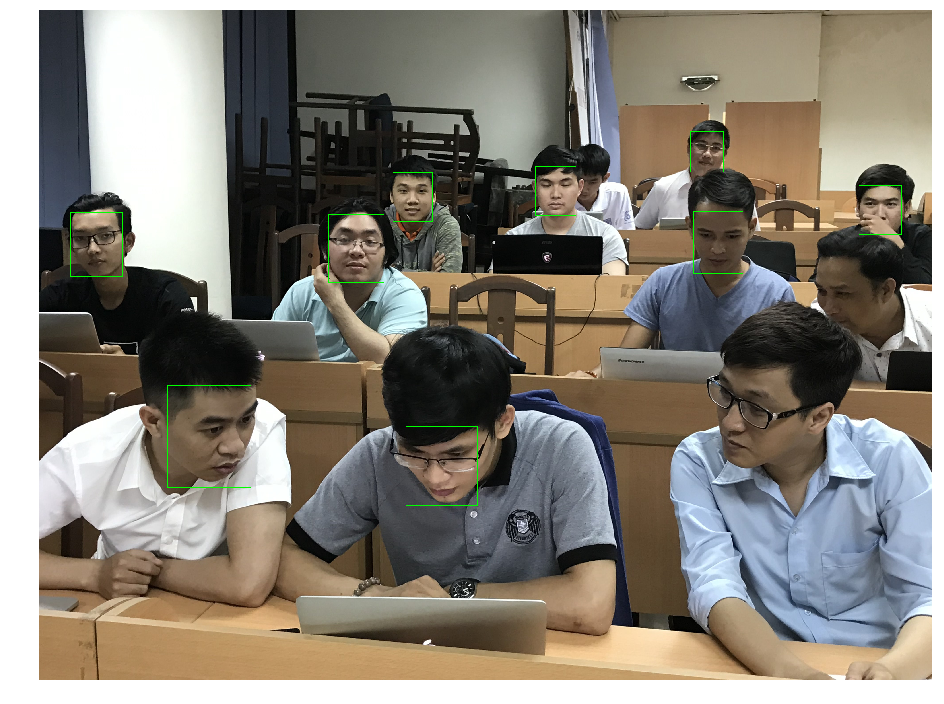

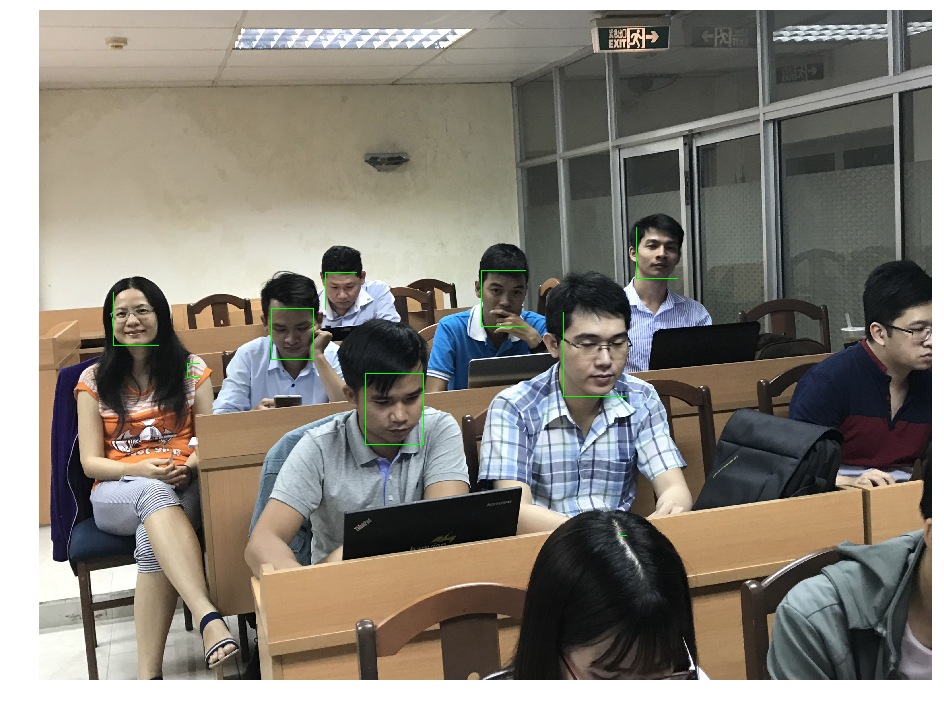

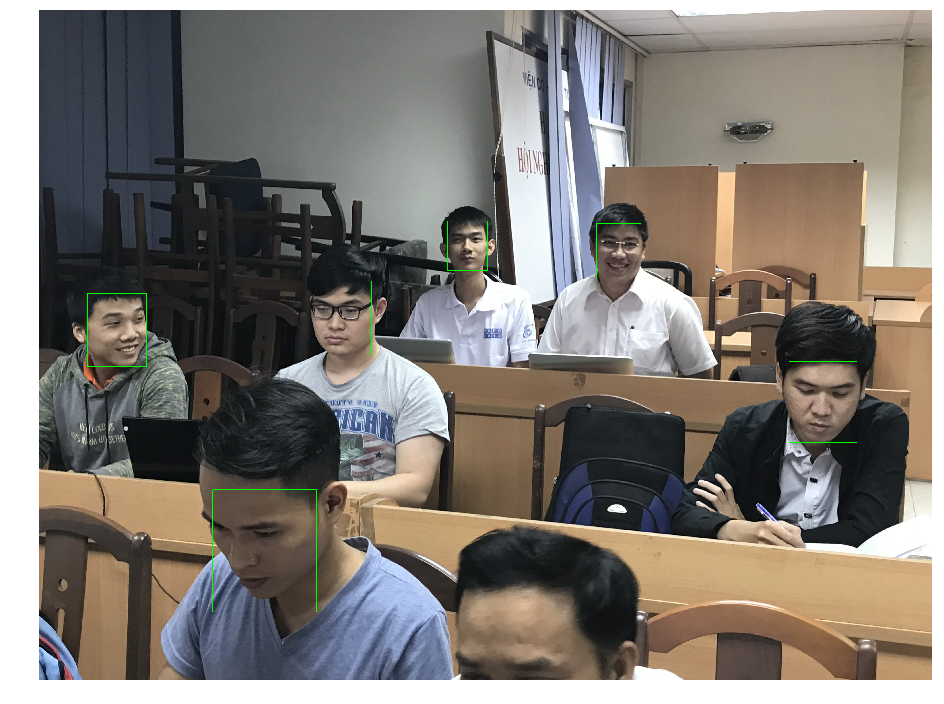

In [5]:
from mtcnn.mtcnn import MTCNN
import cv2
import matplotlib.pyplot as plt
import json
from os import listdir
from os.path import isfile, join

img_path="dataset"

# List all file in directory
img_files = [f for f in listdir(img_path) if isfile(join(img_path, f))]

for img_file in img_files:
    #print ("Processing image " + img_file)
    #print (img_file[:-4])
    
    img = cv2.imread(img_path + "/" + img_file)
    img_show = img
    
    count_face=0
    
    detector = MTCNN()
    
    results = detector.detect_faces(img)
    
    # Save all faces to files
    for i in results:
        (x, y, w, h) = i['box']
        
        img_face = img[y:y+h, x:x+w]
        cv2.imwrite(img_path + "/face/" + img_file[:-4] + "_face" + str(count_face).zfill(3) + ".jpg", img_face)
        
        #plt.rcParams['figure.figsize'] = [4, 4]
        #plt.figure()
        #plt.axis('off')
        #plt.imshow(cv2.cvtColor(img_face, cv2.COLOR_BGR2RGB))
        
        # Draw rectangle on face
        cv2.rectangle(img_show, (x,y), (x+w, y+h), (0, 255, 0), 2)
            
        count_face += 1
    
    plt.rcParams['figure.figsize'] = [16, 16]
    plt.figure()
    plt.axis('off')
    
    plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))